# FIT5196 Assessment 1: Task 2
#### Student Name: Mayank Bhardwaj
#### Student ID: 29325293

Date: 01/09/2018

Environment: Python 3.6.4

Libraries used:
* pandas (for data frame, included in Anaconda Python 3.6) 
* re 2.2.1 (for regular expression, included in Anaconda Python 3.6) 
* nltk 3.2.2 (Natural Language Toolkit, included in Anaconda Python 3.6)
* nltk.collocations (for finding bigrams, included in Anaconda Python 3.6)
* nltk.tokenize (for tokenization, included in Anaconda Python 3.6)
* itertools (for iterating through the values in the dictionary, included in Anaconda Python 3.6)
* sklearn.feature_extraction.text (for using the Count Vectorizer package, included in Anaconda Python 3.6)


## 1. Introduction
* The aim of this task is to build sparse representations for the resumes, which includes word tokenization, vocabulary generation, and the generation of sparse representations. The required tasks are the following:
    * 1 Read all the resume and extract the unique from the list. Use the sentence segmentation and split the file into sentences with the help of Punkt Sentence Tokenizer.
    * 2 Do the normalization in the starting of sentence and use the given regex r"\w+(?:[-']\w+)?" to tokenize the sentencs.
    * 3 Extract vocab list from the vocab dictionary and plot the top 30 most common frequency of words.
    * 4 Extracting bi-grams and Collocations.
    * 5 To make sure collocations will not be divided into two seperate words, we will use MWEtokenizer.
    * 6 Removing the stop words.In addendum to this, we will remove the context-dependent (98% & above) and rare tokens (2% & below).
    * 7 Now we have to do Stemming and removing words less than 3 characters.
    * 8 Now we have vocab list and a pre-defined list of words appearing in those documents (i.e., a vocabulary), we can compute a vector representation for each document. and store in txt file.
* More details for each task will be given in the following sections.

## 2.  Import libraries.

In [1]:
import re
import nltk
from nltk.collocations import *
from itertools import chain
import itertools
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import MWETokenizer
import nltk.data
from nltk.util import ngrams
from nltk.probability import *
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline 

## 3. Sparse Representations
### 3.1 Read all the resume and extract the unique from the list & Normalize the sentences.
* We are reading the resume.txt file which contains the resume for sparse representation.
* The NLTK's Punkt Sentence Tokenizer is used for splitting the text in to sentences and seprate them according to inbuild algorithm. This is mostly known as sentence segmentation.
* all the sentences stored in the sentences and then we have done the normalization on the words which are the first word of each sentences.In addition to this tokenize the word on the basis of given regex r"\w+(?:[-']\w+)?" and store in the dictionary named as vocab_dict.


In [2]:
resume_list=[772, 206,748,356, 739, 393, 101, 326, 722, 473,  89, 809, 706,
             42, 842, 699, 632,  62,595, 108, 70,463, 365,  60, 805, 635,
             57, 435, 651, 570, 566, 597, 775, 268, 437, 347,27 , 286,596,
             86, 411, 821, 315,   6, 605, 195, 478, 355, 574, 204, 831,
             276, 826, 644,63 , 580,761,586, 268,  13, 365, 799, 807, 791,
             13, 676, 839, 368, 122, 120, 505, 479,720, 742,659,714, 234, 615,
             700, 480, 772, 447, 310, 107, 257, 101, 595, 252, 243, 521,64 ,
             599,863,570, 797, 105, 394, 344, 483,  16, 809, 800, 822, 518, 385, 
             402, 612, 261,755, 205,864,677, 437, 422, 836, 303, 396, 309, 606,
             159, 409, 225,  15, 465, 457, 115,426, 440,336,481, 134, 395, 523,
             830, 101, 502, 642, 809, 693, 328, 150,  58,  52, 176,651, 200,447,
             559, 698, 704, 720, 323, 850, 666, 727, 368, 429, 374, 664,  91,
             704, 340,632, 778,857,777, 125, 494, 151, 391, 824, 239, 356, 394,
             336, 224, 556, 431,  83, 263,478, 798,835, 75, 495, 479, 564, 201, 266,
             801, 852, 862,  20, 113, 223, 284,248, 333, 39, 19, 755, 354, 300,
             662, 704, 459,  26, 287, 384, 409, 641, 115, 241,  65,167, 628,780,727,
             114, 123, 801, 369, 486, 208, 823, 754, 384, 215, 410, 403, 666, 818,345,
             444,569,658, 542,  40, 179, 438, 707, 666,  86,  52, 806, 834, 394, 588, 575,  68]
resume_list = set(resume_list)
vocab_dict={}
for each_resume in resume_list:
    
    path = '.\\resumeTxt\\'+'resume_('+str(each_resume)+').txt' # resume path
    
    files = open(path,'r',encoding ='utf8')
    
    text = files.read()
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')  # sentence segmentation

    sentences = sent_detector.tokenize(text.strip())
    split_sent=[]
    
    unigram_all_list=[]
    for sent in sentences:
        split_sent = sent.split(' ')
        
        # Normalization of the sent(tokens)
        each = split_sent[0]
        if each[0].upper() == each[0] : 
            each = each.lower()
           
        split_sent[0] = each
        sent = ' '.join(split_sent)
        
        tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")
        unigram_tokens = tokenizer.tokenize(sent)
      
        unigram_all_list += unigram_tokens
        vocab_dict[each_resume] = unigram_all_list # vocab dictionary of the resume.

resume_dict = vocab_dict

In [3]:
words_1 = list(chain.from_iterable(vocab_dict.values()))
vocab_set_1 = set(words_1)
Lexical_Diversity = len(words_1)/len(vocab_set_1)
print("Vocab Size:", len(vocab_set_1), "\nToken List Size:",len(words_1), "\nLexical Diversity:", Lexical_Diversity )

Vocab Size: 15878 
Token List Size: 136557 
Lexical Diversity: 8.6003904773901


### 3.2 Make the vocabulary list
* Extract vocab list from the vocab dictionary and plot the top 30 most common frequency of words.
* fd1 is the frequency of the vocab in the vocab_all_list

The length of vocabalory before removing stopwords is: 136557


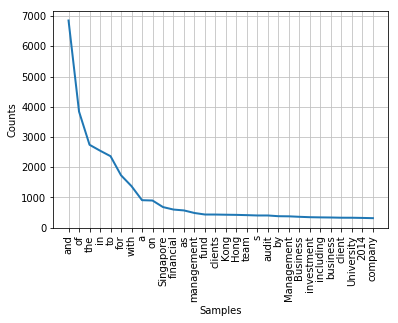

In [4]:
vocab_all_list = list(chain.from_iterable(vocab_dict.values())) # store all the resume list words in one vocab_all_list.
print('The length of vocabalory before removing stopwords is: '+ str(len(vocab_all_list)))
fd_1 = FreqDist(vocab_all_list)
fd_1.plot(30)

### 3.3 Extracting bi-grams and Collocations.
* Bi- grams are the text which occur side by side, they are generally the goes side by side in the engligh language. For example: (gmail', 'com'), ('WORK', 'EXPERIENCE'), ('Key', 'Achievement').
* Bi-gram helps in analyzing the text which occur most commonly in the text file.
* fdbigram is the frequency distribution of bi-grams.

In [5]:
bigrams = ngrams(vocab_all_list, n = 2)
fdbigram = FreqDist(bigrams)

* bigram_200 is the 200 most common bigram in the text input.

In [6]:
bigram_200=fdbigram.most_common(200)

### 3.4 MWETokenizer.
* To make sure collocations will not be divided into two seperate words, we will use MWEtokenizer. This will help in storing the bi-grams together.
* vocab_all_list is the list of unique vocabolary in the vocab_new_dict. 

In [7]:
mwetokenizer = MWETokenizer(bigram_200)
vocab_new_dict =  dict((key, mwetokenizer.tokenize(value)) for key,value in vocab_dict.items())
vocab_all_list = list(chain.from_iterable(vocab_new_dict.values()))
vocab_all_list = list(set(vocab_all_list))

In [8]:
words = list(chain.from_iterable(vocab_new_dict.values()))
vocab_set = set(words)
Lexical_Diversity = len(words)/len(vocab_set)
print("Vocab Size:", len(vocab_set), "\nToken List Size:",len(words), "\nLexical Diversity:", Lexical_Diversity )

Vocab Size: 15878 
Token List Size: 136557 
Lexical Diversity: 8.6003904773901


### 3.5 Stopword removal.
* we have to remove the stopword from the list has been given in the assignment specification.
* we have open the file and read in the stop_word and convert that in the set(to remove duplicate) and store in stopwords_list.
* Now we have removed all the words from the vocab_all_list and use this to remove from the dictionary of vocab_new_dict.

In [9]:
stop_word = open('.\\stopwords_en.txt','r',encoding ='utf8')
stop_word = stop_word.read().splitlines()
#print(stop_word)
stopwords_list = stop_word
stopwords_set = set(stopwords_list)
vocab_new_dict_stop = {}
vocab_all_list = [w for w in vocab_all_list if w not in stopwords_set]

for each_resume in resume_list:
    vocab_new_dict_stop[each_resume] = [w for w in vocab_new_dict[each_resume] if w not in stopwords_set]    

In [10]:
words = list(chain.from_iterable(vocab_new_dict_stop.values()))
vocab_set = set(words)
Lexical_Diversity = len(words)/len(vocab_set)
print("Vocab Size:", len(vocab_set), "\nToken List Size:",len(words), "\nLexical Diversity:", Lexical_Diversity )

Vocab Size: 15559 
Token List Size: 104241 
Lexical Diversity: 6.699723632624204


The length of vocabalory after removing stopwords is: 104241


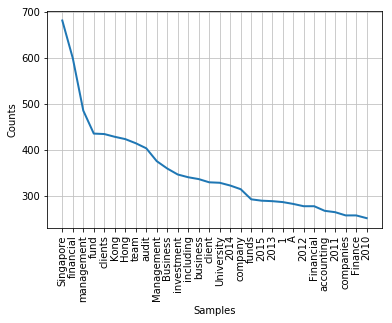

In [11]:
vocab_all_list = list(chain.from_iterable(vocab_new_dict_stop.values())) # store all the resume list words in one vocab_all_list.
print('The length of vocabalory after removing stopwords is: '+ str(len(vocab_all_list)))
fd_2 = FreqDist(words)
fd_2.plot(30)

### 3.6 Context-dependent & Rare tokens
* we have to remove the context-dependent (98% & above) and rare tokens (2% & below).
* Count each occurence of the vocab and calculate the threshold of the token.
* If threshold is below 2 or above 98 than we have to remove that tokens from the dictionary.
* delete_dict contains count of vocabolary and vocab_new_dict is the updated dictionary after removing context-dependent and  rare tokens.

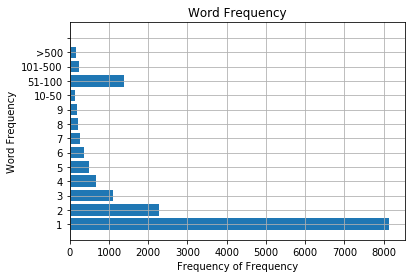

In [12]:
words_3 = list(chain.from_iterable(vocab_new_dict_stop.values()))
fd_3 = FreqDist(words_3)

ffd = FreqDist(fd_3.values())
from pylab import *
y = [0]*14
for k, v in ffd.items():
    if k <= 10:
        y[k-1] = v
    elif k >10 and k <= 50:
        y[10] =  y[10] + v
    elif k >50 and k <= 100:
        y[11] =  y[11] + v
    elif k > 100 :
        y[12] =  y[12] + v
x = range(1, 15) # generate integer from 1 to 14
ytks = list(map(str, range(1, 10))) # covert a integer list to a string list
ytks.append('10-50')
ytks.append('51-100')
ytks.append('101-500')
ytks.append('>500')
barh(x,y, align='center')
yticks(x, ytks)
xlabel('Frequency of Frequency')
ylabel('Word Frequency')
plt.title("Word Frequency")
grid(True)

Above graph represents the Word frequency, i.e. what is the frequency fo each word. As visible, more that 8000 words appear only once.

In [13]:
delete_dict={}
for each_vocab in vocab_all_list:
    count = 0
    for each_resume in resume_list:
        if each_vocab in vocab_new_dict_stop[each_resume]:
            count += 1
            
    delete_dict[each_vocab] = count
delete_list=[]
for each_item,values in delete_dict.items():
    percentage= values/len(resume_list)*100 
    if percentage<98 and percentage>2:
        
        delete_list.append(each_item)

vocab_all_list_new = delete_list
vocab_new_dict_token = {}
for each_resume in resume_list:
    vocab_new_dict_token[each_resume] = [w for w in vocab_new_dict_stop[each_resume] if w in delete_list]

In [14]:
words = list(chain.from_iterable(vocab_new_dict_token.values()))
vocab_set = set(words)
Lexical_Diversity = len(words)/len(vocab_set)
print("Vocab Size:", len(vocab_set), "\nToken List Size:",len(words), "\nLexical Diversity:", Lexical_Diversity )

Vocab Size: 2878 
Token List Size: 82330 
Lexical Diversity: 28.60667129951355


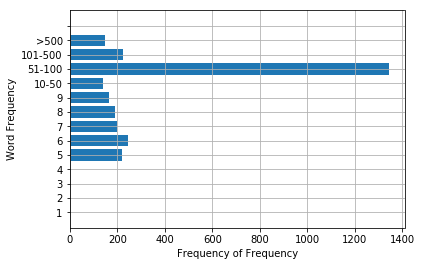

In [15]:
words_3 = list(chain.from_iterable(vocab_new_dict_token.values()))
fd_3 = FreqDist(words_3)

ffd = FreqDist(fd_3.values())
from pylab import *
y = [0]*14
for k, v in ffd.items():
    if k <= 10:
        y[k-1] = v
    elif k >10 and k <= 50:
        y[10] =  y[10] + v
    elif k >50 and k <= 100:
        y[11] =  y[11] + v
    elif k > 100 :
        y[12] =  y[12] + v
x = range(1, 15) # generate integer from 1 to 14
ytks = list(map(str, range(1, 10))) # covert a integer list to a string list
ytks.append('10-50')
ytks.append('51-100')
ytks.append('101-500')
ytks.append('>500')
barh(x,y, align='center')
yticks(x, ytks)
xlabel('Frequency of Frequency')
ylabel('Word Frequency')
grid(True)

Now after removing the context dependent and rare tokens, there is a drastic change in the graoh, where most of the tokens that appear only once have been removed.

### 3.7 Stemming & Removal of words less than 3 characters
* Now we have to do Stemming by using the Porter stemmer. In this process firstly word is identified and then reduce to the base form after removal of prefixes, plural form, suffixes.


In [16]:
stemmer = PorterStemmer()
stem_dict={}

for each_resume in resume_list:
    stem_dict_list=[]
    for values in vocab_new_dict_token[each_resume]:
        if values.lower() == values:
            stem_dict_word = stemmer.stem(values)
            stem_dict_list.append(stem_dict_word)
        else:
             stem_dict_list.append(values)
    
    stem_dict[each_resume] = stem_dict_list
        

print('After applying Porter stemming we have a vocab list of '+str(len(set(list(chain.from_iterable(stem_dict.values())))))+'.')

After applying Porter stemming we have a vocab list of 2303.


* In next step, we are removing the words less than 3 characters.

In [17]:
for each_resume in resume_list:
    stem_dict[each_resume] = [ w for w in stem_dict[each_resume] if len(w) >=3 ]

stem_list = list(chain.from_iterable(stem_dict.values()))
print('After removing the less than 3 character words, we have now left with '+str(len(set(stem_list))),'words.')

After removing the less than 3 character words, we have now left with 2180 words.


In [18]:
words_l = list(chain.from_iterable(stem_dict.values()))
vocab_set_l = set(words_l)
Lexical_Diversity = len(words_l)/len(vocab_set_l)
print("Vocab Size:", len(vocab_set_l), "\nToken List Size:",len(words_l), "\nLexical Diversity:", Lexical_Diversity )

Vocab Size: 2180 
Token List Size: 76747 
Lexical Diversity: 35.20504587155963


### 3.8 Vector Representation
Now we have vocab list and a pre-defined list of words appearing in those documents (i.e., a vocabulary), we can compute a vector representation for each document. and store in txt file.

In [19]:
vectorizer = CountVectorizer(analyzer = "word", vocabulary = set(stem_list) )
data_features = vectorizer.fit_transform([' '.join(value) for value in stem_dict.values()])
print ('The number of resume and vocabolary are' ,data_features.shape)

The number of resume and vocabolary are (216, 2180)


* Below is the sparse representation of vocab in the 29325293_CountVec.txt and vocabolary in 29325293_vocab.txt.

In [20]:
out_file = open("./29325293_CountVec.txt", 'w')
vocab = list(set(stem_list))
vocab.sort()
vocab_dict = {}
i = 0
for w in vocab:
    vocab_dict[w] = i
    i = i + 1

for key,d in stem_dict.items():
    d_idx = [vocab_dict[w] for w in d]
    out_file.write("Resume({}): ".format(key))
    for k, v in FreqDist(d_idx).items():
        out_file.write("{}:{} ".format(k,v))
    out_file.write('\n')
out_file.close()

In [21]:
out_file = open("./29325293_vocab.txt", 'w')

for k,v in vocab_dict.items():
    out_file.write("{}:{} ".format(k,v))
    out_file.write('\n')
out_file.close()

## 4. Statistics

### 4.1. Statistics before wrangling

In [22]:
Lexical_Diversity = len(words_1)/len(vocab_set_1)
print("Vocab Size:", len(vocab_set_1), "\nToken List Size:",len(words_1), "\nLexical Diversity:", Lexical_Diversity )

Vocab Size: 15878 
Token List Size: 136557 
Lexical Diversity: 8.6003904773901


### 4.2. Statistics after wrangling

In [23]:
Lexical_Diversity = len(words_l)/len(vocab_set_l)
print("Vocab Size:", len(vocab_set_l), "\nToken List Size:",len(words_l), "\nLexical Diversity:", Lexical_Diversity )

Vocab Size: 2180 
Token List Size: 76747 
Lexical Diversity: 35.20504587155963


## 4.3. Sample data after every step

In [24]:
resume_list = list(resume_list)

print('Token list of the sample resume initially\n',resume_dict[resume_list[0]])
print('\nToken list of the sample resume after bigrams updation\n',vocab_new_dict[resume_list[0]])
print('\nToken list of the sample resume after removing the Stop words\n',vocab_new_dict_stop[resume_list[0]])
print('\nToken list of the sample resume after removing the context deoendent and rare tokens\n',vocab_new_dict_token[resume_list[0]])
print('\nToken list of the sample resume after stemming\n',stem_dict[resume_list[0]])
print('\nSparse Representation of the sample resume\n')
d_idx = [vocab_dict[w] for w in d]
for k, v in FreqDist(d_idx).items():
    print("{}:{} ".format(k,v), end = ' ')

Token list of the sample resume initially
 ['chow', 'SHING', 'LUNG', 'CHESTER', 'Address', '24D', 'Kwai', 'Chung', 'Fa', 'Yuen', '52', 'Wo', 'Yi', 'Hop', 'Road', 'Kwai', 'Chung', 'N', 'T', 'tel', '852', '9279', '7979', 'Email', 'chester', 'sl', 'chow', 'gmail', 'com', 'WORK', 'EXPERIENCE', 'MAR', '2016', 'PRESENT', 'Alibaba', 'Group', 'Company', 'Secretarial', 'Officer', 'To', 'handle', 'full', 'spectrum', 'of', 'company', 'secretarial', 'duties', 'for', 'three', 'listed', 'companies', 'Alibaba', 'Pictures', 'Group', 'Limited', 'Alibaba', 'Health', 'Information', 'Technology', 'Limited', 'and', 'AGTech', 'Holdings', 'Limited', 'To', 'review', 'and', 'negotiate', 'contracts', 'in', 'listed', 'companies', 'M', 'A', 'transactions', 'To', 'review', 'business', 'agreements', 'NDA', 'employment', 'contracts', 'and', 'procurement', 'contracts', 'Key', 'Achievement', 'Assisted', 'in', 'over', '20', 'disclosable', 'transactions', 'and', 'connected', 'transactions', 'Reviewed', 'and', 'developed

## 5. References
* Tutorial 4 & 5, Exploring Pre-Processed text and Generating Features for Text Pre-processing from Data Wrangling : www.moodle.com
* Visual representation from Sample report